Import necessary libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Specified the file path the data locate

In [2]:
filepath="/content/drive/MyDrive/TRY/Datium Data Science/"

In [3]:
datarpt =pd.read_fwf(filepath+"DatiumSample.rpt",sep="\t")

Read data not in correct format as the first column consist all the data

Get the column name for the dataset by splitting the first columns

In [4]:
colname= np.array(datarpt.columns[0].split())

Combine it with the rest of the column name

In [5]:
addcol = np.array(datarpt.columns[1:])

In [6]:
fullcol= np.concatenate((colname,addcol))

In [7]:
testframe = pd.read_fwf(filepath+"DatiumSample.rpt", delimiter="\t")

Split the data by the delimiter "\t"

In [8]:
data=testframe[datarpt.columns[0]].str.split(pat="\t",expand=True)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,Holden,Commodore,HOLD,COMMODO,2008,0,0,VE Omega Sedan 4dr. Auto 4sp 3.6i,F,L,F,VE,NULL,Omega,NULL,Sedan,NULL,NULL,NULL,NULL,Rear Wheel Drive,RWD,Automatic,Floor,4,4,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,73,Multi-Point Injection,Electronic Sequential,NULL,NULL,6G1EK52B#8L######,...,NULL,NULL,NULL,NULL,NULL,NULL,5.00,5.00,3.00,260,NULL,NULL,NULL,NULL,10.90,NULL,NULL,4,Passenger,Large,< $70K,T,230,140,2500,5000,3850,6450,2100,3500,5500,34790,White,Perth (WA),Auction,2015-11-03 00:00:00.000,02/2008,93,227878,2000.00
1,Holden,Commodore,HOLD,COMMODO,1993,7,41,VR Executive Wagon 5dr. Auto 4sp 3.8i,F,L,F,VR,NULL,Executive,NULL,Wagon,NULL,NULL,NULL,NULL,Rear Wheel Drive,RWD,Automatic,Floor,4,5,3791,3.8,6,Petrol - Unleaded ULP,Aspirated,PASS,Pushrod,Piston,68,Multi-Point Injection,Electronic,NULL,NULL,6H8VRK35HPL######,...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,12.00,7.60,9.20,NULL,NULL,NULL,Passenger,Large,< $70K,T,600,360,NULL,NULL,NULL,2250,NULL,NULL,2000,27978,Red,Belmore (NSW),Auction,2000-10-18 00:00:00.000,08/1993,86,153091,6800.00
2,Toyota,RAV4,TOYO,RAV4,2012,0,6,ACA33R MY12 CV Wagon 5dr Man 5sp 4x4 2.4i,F,L,F,ACA33R,MY12,CV,NULL,Wagon,NULL,NULL,NULL,NULL,4X4 On Demand,4XO,Manual,Floor,5,5,2362,2.4,4,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,60,Multi-Point Injection,Electronic Sequential,3560,2060,JTMBD33V*05######,...,NULL,NULL,NULL,NULL,NULL,NULL,6.00,6.50,3.50,213,NULL,NULL,NULL,NULL,9.10,NULL,NULL,4,SUV,Medium,< $60K,T,130,80,12450,15450,14150,17450,10900,12700,15800,31990,040 - Glacier White (T),Sunshine (VIC),Dealer Only Auction,2014-02-05 00:00:00.000,10/2012,16,27374,22900.00
3,Holden,Commodore,HOLD,COMMODO,2007,0,11,VZ@VE MY07 Executive Wagon 5dr. Auto 4sp 3.6i,F,L,F,VZ@VE,MY07,Executive,NULL,Wagon,NULL,NULL,NULL,NULL,Rear Wheel Drive,RWD,Automatic,Floor,4,5,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,75,Multi-Point Injection,Electronic Sequential,NULL,NULL,6G1ZK82B#8L######,...,NULL,NULL,NULL,NULL,NULL,NULL,4.50,5.00,3.00,264,NULL,NULL,NULL,NULL,11.20,NULL,NULL,4,Passenger,Large,< $70K,T,250,150,1750,4250,3100,5700,1400,2800,4800,35990,Quicksilver,Belmore (NSW),Auction,2011-01-10 00:00:00.000,01/2007,48,99452,10500.00
4,Toyota,Tarago,TOYO,TARAGO,2007,0,0,ACR50R GLi Wagon 8st 5dr Spts Auto 4sp 2.4i,F,L,F,ACR50R,NULL,GLi,NULL,Wagon,NULL,NULL,NULL,NULL,Front Wheel Drive,FWD,Sports Automatic,Dash,4,5,2362,2.4,4,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,65,Multi-Point Injection,Electronic Sequential,NULL,2430,JTEGD52M##7######,...,NULL,NULL,NULL,NULL,NULL,NULL,5.50,6.50,3.50,222,293,181,12.60,7.70,9.50,NULL,NULL,NULL,Passenger,People Movers,< $60K,T,250,150,8850,11600,10800,13800,7600,9700,12400,49490,Silver,Hobart (TAS),Special Fixed Price,2009-05-23 00:00:00.000,01/2007,28,44355,31320.00


In [10]:
df = pd.DataFrame(data)

Set the column name

In [11]:
df=df.set_axis(fullcol, axis=1)

In [12]:
df.head(2)

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,LimitedEdition,Series,SeriesModelYear,BadgeDescription,BadgeSecondaryDescription,BodyStyleDescription,BodyConfigDescription,WheelBaseConfig,Roofline,ExtraIdentification,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,DoorNum,EngineSize,EngineDescription,Cylinders,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelCapacity,FuelDeliveryDescription,MethodOfDeliveryDescription,GrossCombinationMAss,GrossVehicleMass,VIN,...,QuickChargeMins,NormalChargeVoltage,QuickChargeVoltage,KMRangeElectricEng,ElectricEngineLocation,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,EmissionStandard,MaxEthanolBlend,AncapRating,VFactsClass,VFactsSegment,VFactsPrice,IsPPlateApproved,AverageKM,GoodKM,AvgWholesale,AvgRetail,GoodWholesale,GoodRetail,TradeMin,TradeMax,PrivateMax,NewPrice,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date,Age_Comp_Months,KM,Sold_Amount
0,Holden,Commodore,HOLD,COMMODO,2008,0,0,VE Omega Sedan 4dr. Auto 4sp 3.6i,F,L,F,VE,NULL,Omega,NULL,Sedan,NULL,NULL,NULL,NULL,Rear Wheel Drive,RWD,Automatic,Floor,4,4,3565,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,73,Multi-Point Injection,Electronic Sequential,NULL,NULL,6G1EK52B#8L######,...,NULL,NULL,NULL,NULL,NULL,NULL,5.00,5.00,3.00,260,NULL,NULL,NULL,NULL,10.90,NULL,NULL,4,Passenger,Large,< $70K,T,230,140,2500,5000,3850,6450,2100,3500,5500,34790,White,Perth (WA),Auction,2015-11-03 00:00:00.000,02/2008,93,227878,2000.00
1,Holden,Commodore,HOLD,COMMODO,1993,7,41,VR Executive Wagon 5dr. Auto 4sp 3.8i,F,L,F,VR,NULL,Executive,NULL,Wagon,NULL,NULL,NULL,NULL,Rear Wheel Drive,RWD,Automatic,Floor,4,5,3791,3.8,6,Petrol - Unleaded ULP,Aspirated,PASS,Pushrod,Piston,68,Multi-Point Injection,Electronic,NULL,NULL,6H8VRK35HPL######,...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,12.00,7.60,9.20,NULL,NULL,NULL,Passenger,Large,< $70K,T,600,360,NULL,NULL,NULL,2250,NULL,NULL,2000,27978,Red,Belmore (NSW),Auction,2000-10-18 00:00:00.000,08/1993,86,153091,6800.00


In [ ]:
df.info(verbose=True,null_counts=True)

In [14]:
columnss=pd.DataFrame(df.columns)

Replace NULL in the dataset with NaN value. NULL value in the dataset is string and not an actual NULL value. Therefor when checking with pandas build in function like .isna or .isnull the result is always zero but the actual said otherwise.

In [15]:
df.replace({str('NULL'):np.NaN},inplace=True)

Remove row that Sold Amount is Null which will be used for predict sales price.

In [16]:
df=df[df.Sold_Amount.notnull()]

Next drop columns that cannot use and columns that may not related to the predict sales price

In [17]:
coldrop=['AvgWholesale', 'AvgRetail', 'GoodWholesale', 'GoodRetail', 'TradeMin', 'TradeMax', 'PrivateMax']

In [18]:
df.drop(coldrop,axis=1,inplace=True)

In [19]:
coldropsec=['YearGroup','MonthGroup','Description','BadgeSecondaryDescription']

In [20]:
df.drop(coldropsec,axis=1,inplace=True)

In [21]:
df.shape

(62172, 119)

In [ ]:
df.info(verbose=True,null_counts=True)

From the function above we know that some of the columns that only consist of small amount of value for example QuickChargeMins columns with no value at all                

Next will be remove these columns

In [62]:
df.isna().sum().sort_values(ascending=False)

QuickChargeVoltage               62172
QuickChargeMins                  62172
NormalChargeVoltage              62170
NormalChargeMins                 62170
TopSpeedElectricEng              62167
                                 ...  
OptionCategory                       0
EngineTypeDescription                0
FuelDeliveryDescription              0
BuildCountryOriginDescription        0
Sold_Amount                          0
Length: 118, dtype: int64

In [76]:
len(df.columns[df.isna().sum()/len(df)>0.85])

26

There are 26 columns that 85 percent of it is missing. I will drop all these columns instead of filling value which may be not accurate 

In [77]:
df.drop(df.columns[df.isna().sum()/len(df)>0.85],axis=1,inplace=True)

In [81]:
df.drop('Sold_Date',axis=1,inplace=True)

In [82]:
df.shape

(62172, 91)

In [92]:
df['Sold_Amount'] = df['Sold_Amount'].astype(float)

In [99]:
df=df[df.GearNum.notnull()]

In [ ]:
for i in df.columns:
  print("THis is "+i+" unique value :"+str(df[i].unique()))

# Feature Selection
The feature selected is based on what I think is needed when prediciting the sales amount. While I should consult with expert to confirm which feature is important when it comes to predict sales amount.

In [131]:
col_touse=['MakeCode','CurrentRelease','ImportFlag','LimitedEdition','BodyStyleDescription','BodyConfigDescription','DriveDescription'
,'DriveCode','GearTypeDescription','GearLocationDescription','GearNum','DoorNum','EngineDescription','Cylinders','FuelTypeDescription','InductionDescription','OptionCategory',
'CamDescription','EngineTypeDescription','FuelCapacity','FuelDeliveryDescription','MethodOfDeliveryDescription',
'VIN','WheelBase','Height','Length','Width','Power','Torque','RonRating',
'SeatCapacity','BuildCountryOriginDescription','ValvesCylinder','EngineCycleDescription','EngineConfigurationDescription','EngineLocation','Acceleration',
'WarrantyCustAssist','WarrantyYears','WarrantyKM','FirstServiceKM','FirstServiceMonths','RegServiceMonths','GreenhouseRating',
'AirpollutionRating','CO2Combined','FuelCombined','EmissionStandard','AncapRating',
'IsPPlateApproved','AverageKM','NewPrice','Colour','SaleCategory','Sold_Amount']

In [133]:
trdata=df[col_touse]

In [134]:
trdata.head()

,MakeCode,CurrentRelease,ImportFlag,LimitedEdition,BodyStyleDescription,BodyConfigDescription,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,DoorNum,EngineDescription,Cylinders,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelCapacity,FuelDeliveryDescription,MethodOfDeliveryDescription,VIN,WheelBase,Height,Length,Width,Power,Torque,RonRating,SeatCapacity,BuildCountryOriginDescription,ValvesCylinder,EngineCycleDescription,EngineConfigurationDescription,EngineLocation,Acceleration,WarrantyCustAssist,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,GreenhouseRating,AirpollutionRating,CO2Combined,FuelCombined,EmissionStandard,AncapRating,IsPPlateApproved,AverageKM,NewPrice,Colour,SaleCategory,Sold_Amount
0,HOLD,F,L,F,Sedan,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4,4,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,73,Multi-Point Injection,Electronic Sequential,6G1EK52B#8L######,2915,1476,4894,1899,180.00,330,91,5,AUSTRALIA,4,4 Stroke,V60,Front,NaN,3yr Roadside,3,100000,15000,12,12,5.00,5.00,260,10.90,NaN,4,T,230,34790,White,Auction,2000.0
1,HOLD,F,L,F,Wagon,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4,5,3.8,6,Petrol - Unleaded ULP,Aspirated,PASS,Pushrod,Piston,68,Multi-Point Injection,Electronic,6H8VRK35HPL######,2822,1478,4903,1794,130.00,295,NaN,5,AUSTRALIA,2,4 Stroke,V90,Front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.20,NaN,NaN,T,600,27978,Red,Auction,6800.0
2,TOYO,F,L,F,Wagon,NaN,4X4 On Demand,4XO,Manual,Floor,5,5,2.4,4,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,60,Multi-Point Injection,Electronic Sequential,JTMBD33V*05######,2660,1695,4625,1815,125.00,224,91,5,JAPAN,4,4 Stroke,In-line,Front,NaN,NaN,3,100000,5000,3,6,6.00,6.50,213,9.10,NaN,4,T,130,31990,040 - Glacier White (T),Dealer Only Auction,22900.0
3,HOLD,F,L,F,Wagon,NaN,Rear Wheel Drive,RWD,Automatic,Floor,4,5,3.6,6,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,75,Multi-Point Injection,Electronic Sequential,6G1ZK82B#8L######,2938,1527,5033,1847,172.00,320,91,5,AUSTRALIA,4,4 Stroke,V60,Front,NaN,3yr Roadside,3,100000,15000,12,12,4.50,5.00,264,11.20,NaN,4,T,250,35990,Quicksilver,Auction,10500.0
4,TOYO,F,L,F,Wagon,NaN,Front Wheel Drive,FWD,Sports Automatic,Dash,4,5,2.4,4,Petrol - Unleaded ULP,Aspirated,PASS,DOHC with VVT,Piston,65,Multi-Point Injection,Electronic Sequential,JTEGD52M##7######,2950,1750,4795,1800,125.00,224,91,8,JAPAN,4,4 Stroke,In-line,Front,NaN,Roadside,3,100000,5000,3,6,5.50,6.50,222,9.50,NaN,NaN,T,250,49490,Silver,Special Fixed Price,31320.0


## Convert Data type
Some of the column only consist numeric value so changing them from object to float data type

In [147]:
intcol=['GearNum','DoorNum','EngineDescription','Cylinders','FuelCapacity','WheelBase','Height','Length','Width','Power','Torque','RonRating','SeatCapacity',
      'ValvesCylinder','WarrantyYears','WarrantyKM','FirstServiceKM','FirstServiceMonths','RegServiceMonths','GreenhouseRating','AirpollutionRating',
      'CO2Combined','FuelCombined','AncapRating','AverageKM']

In [153]:
trdata.replace({"13B":13},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [154]:
trdata[intcol] = trdata[intcol].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [156]:
objList = trdata.select_dtypes(include = "object").columns
print (objList)

Index(['MakeCode', 'CurrentRelease', 'ImportFlag', 'LimitedEdition',
       'BodyStyleDescription', 'BodyConfigDescription', 'DriveDescription',
       'DriveCode', 'GearTypeDescription', 'GearLocationDescription',
       'FuelTypeDescription', 'InductionDescription', 'OptionCategory',
       'CamDescription', 'EngineTypeDescription', 'FuelDeliveryDescription',
       'MethodOfDeliveryDescription', 'VIN', 'BuildCountryOriginDescription',
       'EngineCycleDescription', 'EngineConfigurationDescription',
       'EngineLocation', 'Acceleration', 'WarrantyCustAssist',
       'EmissionStandard', 'IsPPlateApproved', 'NewPrice', 'Colour',
       'SaleCategory'],
      dtype='object')


In [ ]:
trdata=trdata.dropna()

# Feature Encoding
Using label encoding because there are many unique value in each columns.
Using one-hot encoding will increase the training size

In [137]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [157]:
enc = LabelEncoder()

In [158]:
trdata[objList] = trdata[objList].apply(enc.fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


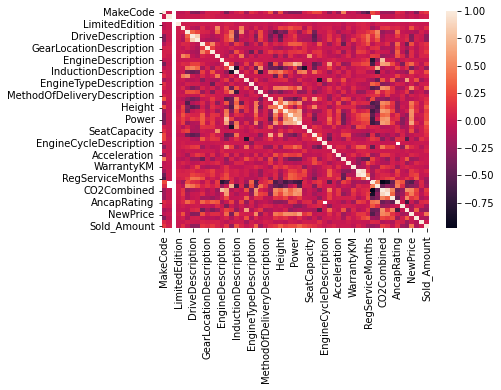

In [193]:
sns.heatmap(trdata.corr())

In [215]:
X=trdata.iloc[:,:-1]
y=trdata.iloc[:,-1]

#Splitting data into training and testing dataset

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#Import libraries for modelling and also evalution

In [220]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.tree import export_text
from sklearn import tree

Modelling

In [217]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [218]:
predictions =model.predict(X_test)

Evaluation

In [219]:
print("Mean Absolute Error", mean_absolute_error(y_test, predictions))
print("Mean Square Error", mean_squared_error(y_test, predictions))
print("R-squared", r2_score(y_test, predictions))

Mean Absolute Error 4053.0646258459783
Mean Square Error 36876551.020103835
R-squared 0.36653700282158985


In [221]:
print("Training Score", model.score(X_train, y_train))

Training Score 0.9249007443222986


In [222]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_51 <= 3248.00
|   |--- feature_27 <= 300.50
|   |   |--- feature_16 <= 2.50
|   |   |   |--- feature_27 <= 199.00
|   |   |   |   |--- feature_9 <= 3.00
|   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |--- feature_53 <= 4.50
|   |   |   |   |   |   |   |--- feature_27 <= 97.00
|   |   |   |   |   |   |   |   |--- feature_53 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_28 <= 192.00
|   |   |   |   |   |   |   |   |   |   |--- feature_51 <= 527.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- feature_51 >  527.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |--- feature_28 >  192.00
|   |   |   |   |   |   |   |   |   |   |--- feature_43 <= 8.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_43 >  8.25
|   |   |   |   